Mounted at /content/drive
Dataset loaded successfully. First 5 rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Model Evaluation Metrics:
Accuracy: 0.75
Precision: 0.65
Recall: 0.67
F1 Score: 0.66


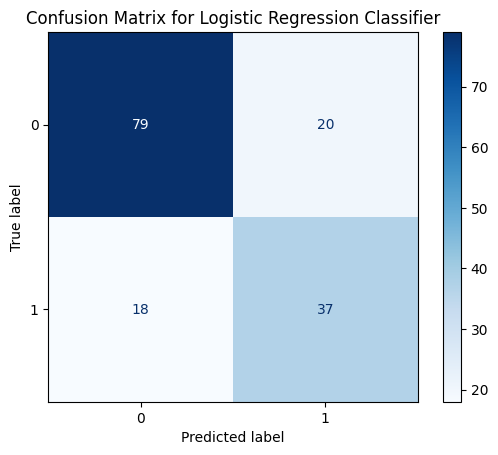

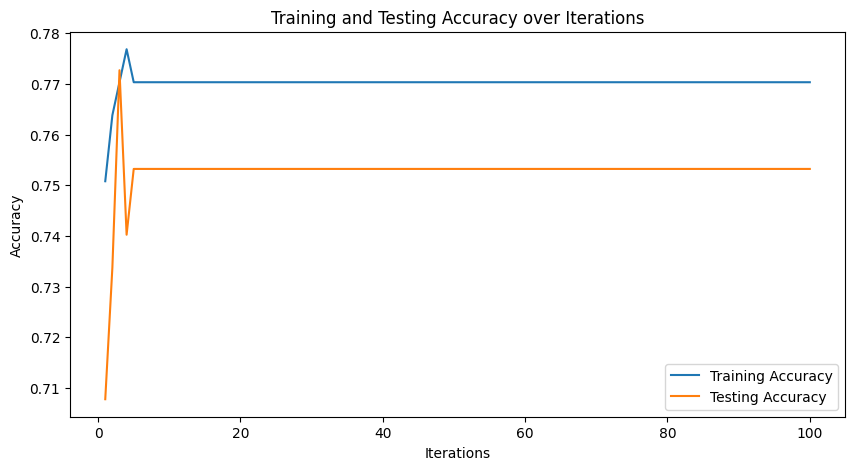

In [19]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)

# Mount Google Drive (force remount if needed)
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Verify if the file exists in the specified location
import os
file_path = '/content/drive/MyDrive/Home work3/diabetes.csv'
if not os.path.exists(file_path):
    print(f"Error: File not found at {file_path}")
    print("Please ensure the file path is correct.")
else:
    # Load the dataset
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully. First 5 rows:")
    print(data.head())  # Verify the dataset

    # Splitting data into features and target
    X = data.drop(columns=['Outcome'])
    y = data['Outcome']

    # Split data into training (80%) and testing (20%) sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train logistic regression model
    log_reg = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)
    log_reg.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    y_pred = log_reg.predict(X_test_scaled)

    # Calculate and print evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\nModel Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    # Plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix for Logistic Regression Classifier')
    plt.show()  # Ensure plot is displayed

    # Plot training and testing accuracy over iterations
    train_accuracies = []
    test_accuracies = []
    iterations = range(1, 101)

    # Train once and collect scores for plotting
    for i in iterations:
        model = LogisticRegression(max_iter=i, solver='lbfgs', random_state=42)
        model.fit(X_train_scaled, y_train)
        train_accuracies.append(model.score(X_train_scaled, y_train))
        test_accuracies.append(model.score(X_test_scaled, y_test))

    # Plot accuracy over iterations
    plt.figure(figsize=(10, 5))
    plt.plot(iterations, train_accuracies, label='Training Accuracy')
    plt.plot(iterations, test_accuracies, label='Testing Accuracy')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.title('Training and Testing Accuracy over Iterations')
    plt.legend()
    plt.show()  # Ensure plot is displayed



Cancer Dataset Logistic Regression Metrics (Without Penalty):
Accuracy: 0.97
Precision: 0.97
Recall: 0.99
F1 Score: 0.98


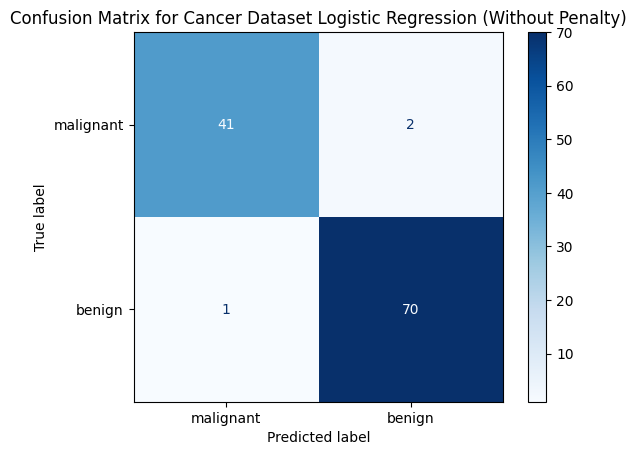


Cancer Dataset Logistic Regression Metrics (With L2 Penalty):
Accuracy: 0.97
Precision: 0.97
Recall: 0.99
F1 Score: 0.98


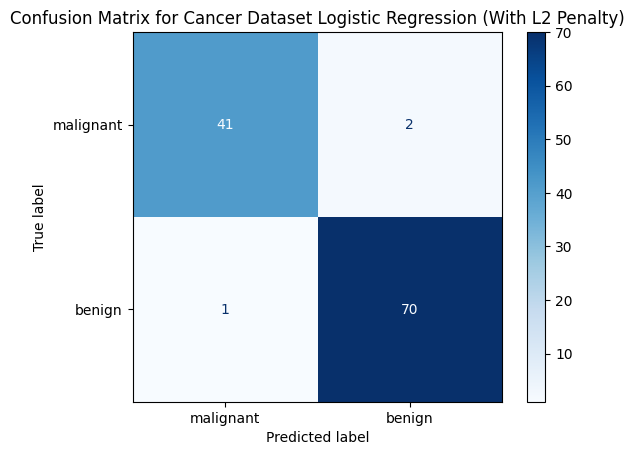

In [14]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)

# Load the breast cancer dataset
cancer_data = load_breast_cancer()
X_cancer = cancer_data.data
y_cancer = cancer_data.target

# Split the dataset into training (80%) and testing (20%) sets
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(
    X_cancer, y_cancer, test_size=0.2, random_state=42
)

# Scale the data
scaler = StandardScaler()
X_train_cancer_scaled = scaler.fit_transform(X_train_cancer)
X_test_cancer_scaled = scaler.transform(X_test_cancer)

# Train logistic regression without regularization
log_reg_cancer = LogisticRegression(max_iter=3000, solver='saga', random_state=42)
log_reg_cancer.fit(X_train_cancer_scaled, y_train_cancer)

# Make predictions on the test set
y_pred_cancer = log_reg_cancer.predict(X_test_cancer_scaled)

# Calculate and print evaluation metrics
accuracy_cancer = accuracy_score(y_test_cancer, y_pred_cancer)
precision_cancer = precision_score(y_test_cancer, y_pred_cancer)
recall_cancer = recall_score(y_test_cancer, y_pred_cancer)
f1_cancer = f1_score(y_test_cancer, y_pred_cancer)

print(f"\nCancer Dataset Logistic Regression Metrics (Without Penalty):")
print(f"Accuracy: {accuracy_cancer:.2f}")
print(f"Precision: {precision_cancer:.2f}")
print(f"Recall: {recall_cancer:.2f}")
print(f"F1 Score: {f1_cancer:.2f}")

# Plot the confusion matrix (Without Penalty)
cm_cancer = confusion_matrix(y_test_cancer, y_pred_cancer)
disp_cancer = ConfusionMatrixDisplay(confusion_matrix=cm_cancer, display_labels=cancer_data.target_names)
disp_cancer.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Cancer Dataset Logistic Regression (Without Penalty)')
plt.show()

# Train logistic regression with L2 regularization
log_reg_cancer_penalty = LogisticRegression(penalty='l2', C=1.0, max_iter=3000, solver='saga', random_state=42)
log_reg_cancer_penalty.fit(X_train_cancer_scaled, y_train_cancer)

# Make predictions with the regularized model
y_pred_cancer_penalty = log_reg_cancer_penalty.predict(X_test_cancer_scaled)

# Calculate and print evaluation metrics for the regularized model
accuracy_cancer_penalty = accuracy_score(y_test_cancer, y_pred_cancer_penalty)
precision_cancer_penalty = precision_score(y_test_cancer, y_pred_cancer_penalty)
recall_cancer_penalty = recall_score(y_test_cancer, y_pred_cancer_penalty)
f1_cancer_penalty = f1_score(y_test_cancer, y_pred_cancer_penalty)

print(f"\nCancer Dataset Logistic Regression Metrics (With L2 Penalty):")
print(f"Accuracy: {accuracy_cancer_penalty:.2f}")
print(f"Precision: {precision_cancer_penalty:.2f}")
print(f"Recall: {recall_cancer_penalty:.2f}")
print(f"F1 Score: {f1_cancer_penalty:.2f}")

# Plot the confusion matrix (With Penalty)
cm_cancer_penalty = confusion_matrix(y_test_cancer, y_pred_cancer_penalty)
disp_cancer_penalty = ConfusionMatrixDisplay(confusion_matrix=cm_cancer_penalty, display_labels=cancer_data.target_names)
disp_cancer_penalty.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Cancer Dataset Logistic Regression (With L2 Penalty)')
plt.show()



Cancer Dataset Naive Bayes Metrics:
Accuracy: 0.96
Precision: 0.96
Recall: 0.99
F1 Score: 0.97


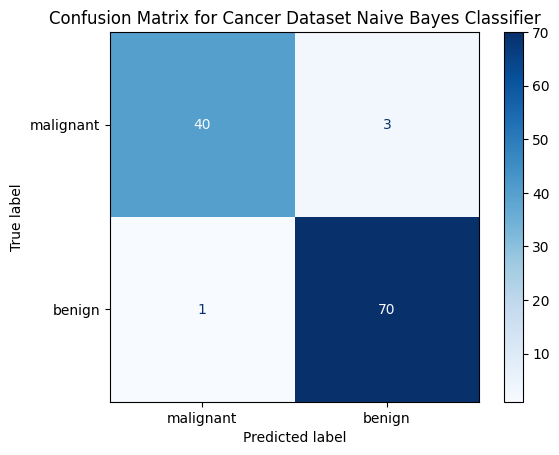


Comparison with Logistic Regression (Without Penalty):
Accuracy Difference: 0.01
Precision Difference: 0.01
Recall Difference: 0.00
F1 Score Difference: 0.01


In [16]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)

# Load the cancer dataset
cancer_data = load_breast_cancer()
X_cancer = cancer_data.data
y_cancer = cancer_data.target

# Split the dataset into training (80%) and testing (20%) sets
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(
    X_cancer, y_cancer, test_size=0.2, random_state=42
)

# Scale the data (Naive Bayes does not need scaling, but we keep it for consistency)
scaler = StandardScaler()
X_train_cancer_scaled = scaler.fit_transform(X_train_cancer)
X_test_cancer_scaled = scaler.transform(X_test_cancer)

# Train a Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_cancer_scaled, y_train_cancer)

# Make predictions on the test set
y_pred_nb = nb_classifier.predict(X_test_cancer_scaled)

# Calculate and print evaluation metrics
accuracy_nb = accuracy_score(y_test_cancer, y_pred_nb)
precision_nb = precision_score(y_test_cancer, y_pred_nb)
recall_nb = recall_score(y_test_cancer, y_pred_nb)
f1_nb = f1_score(y_test_cancer, y_pred_nb)

print(f"\nCancer Dataset Naive Bayes Metrics:")
print(f"Accuracy: {accuracy_nb:.2f}")
print(f"Precision: {precision_nb:.2f}")
print(f"Recall: {recall_nb:.2f}")
print(f"F1 Score: {f1_nb:.2f}")

# Plot the confusion matrix
cm_nb = confusion_matrix(y_test_cancer, y_pred_nb)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=cancer_data.target_names)
disp_nb.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Cancer Dataset Naive Bayes Classifier')
plt.show()

# Comparison with Logistic Regression from Problem 2 (using stored metrics)
print("\nComparison with Logistic Regression (Without Penalty):")
print(f"Accuracy Difference: {accuracy_cancer - accuracy_nb:.2f}")
print(f"Precision Difference: {precision_cancer - precision_nb:.2f}")
print(f"Recall Difference: {recall_cancer - recall_nb:.2f}")
print(f"F1 Score Difference: {f1_cancer - f1_nb:.2f}")


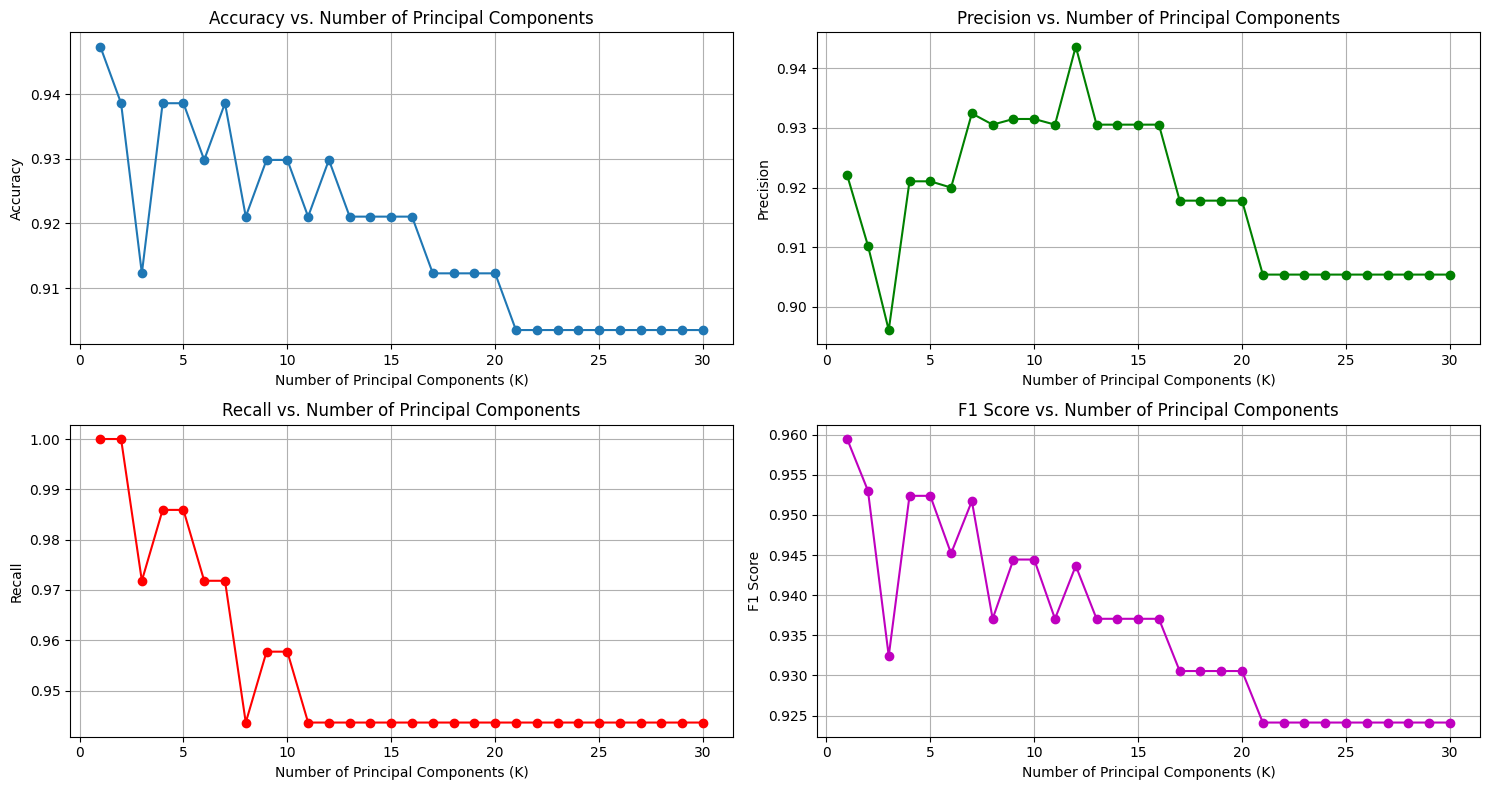

In [17]:
# Import necessary libraries
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB

# Define a function to apply PCA and train Naive Bayes for different K values
def train_naive_bayes_with_pca(X_train, X_test, y_train, y_test, max_components=30):
    accuracies, precisions, recalls, f1_scores = [], [], [], []

    # Iterate over different numbers of principal components (K)
    for k in range(1, max_components + 1):
        # Apply PCA with K components
        pca = PCA(n_components=k)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        # Train Naive Bayes on the PCA-transformed data
        nb_classifier = GaussianNB()
        nb_classifier.fit(X_train_pca, y_train)

        # Make predictions on the test set
        y_pred = nb_classifier.predict(X_test_pca)

        # Calculate metrics
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Store metrics for this value of K
        accuracies.append(acc)
        precisions.append(prec)
        recalls.append(rec)
        f1_scores.append(f1)

    return accuracies, precisions, recalls, f1_scores

# Load the cancer dataset
cancer_data = load_breast_cancer()
X_cancer = cancer_data.data
y_cancer = cancer_data.target

# Split the dataset into training and testing sets
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(
    X_cancer, y_cancer, test_size=0.2, random_state=42
)

# Apply PCA and train Naive Bayes on different K values
max_components = X_cancer.shape[1]
accuracies, precisions, recalls, f1_scores = train_naive_bayes_with_pca(
    X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer, max_components
)

# Plot accuracy, precision, recall, and F1 score over different K values
plt.figure(figsize=(15, 8))

# Plot Accuracy
plt.subplot(2, 2, 1)
plt.plot(range(1, max_components + 1), accuracies, marker='o', label='Accuracy')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Principal Components')
plt.grid(True)

# Plot Precision
plt.subplot(2, 2, 2)
plt.plot(range(1, max_components + 1), precisions, marker='o', label='Precision', color='g')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Precision')
plt.title('Precision vs. Number of Principal Components')
plt.grid(True)

# Plot Recall
plt.subplot(2, 2, 3)
plt.plot(range(1, max_components + 1), recalls, marker='o', label='Recall', color='r')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Recall')
plt.title('Recall vs. Number of Principal Components')
plt.grid(True)

# Plot F1 Score
plt.subplot(2, 2, 4)
plt.plot(range(1, max_components + 1), f1_scores, marker='o', label='F1 Score', color='m')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Number of Principal Components')
plt.grid(True)

# Display the plots
plt.tight_layout()
plt.show()


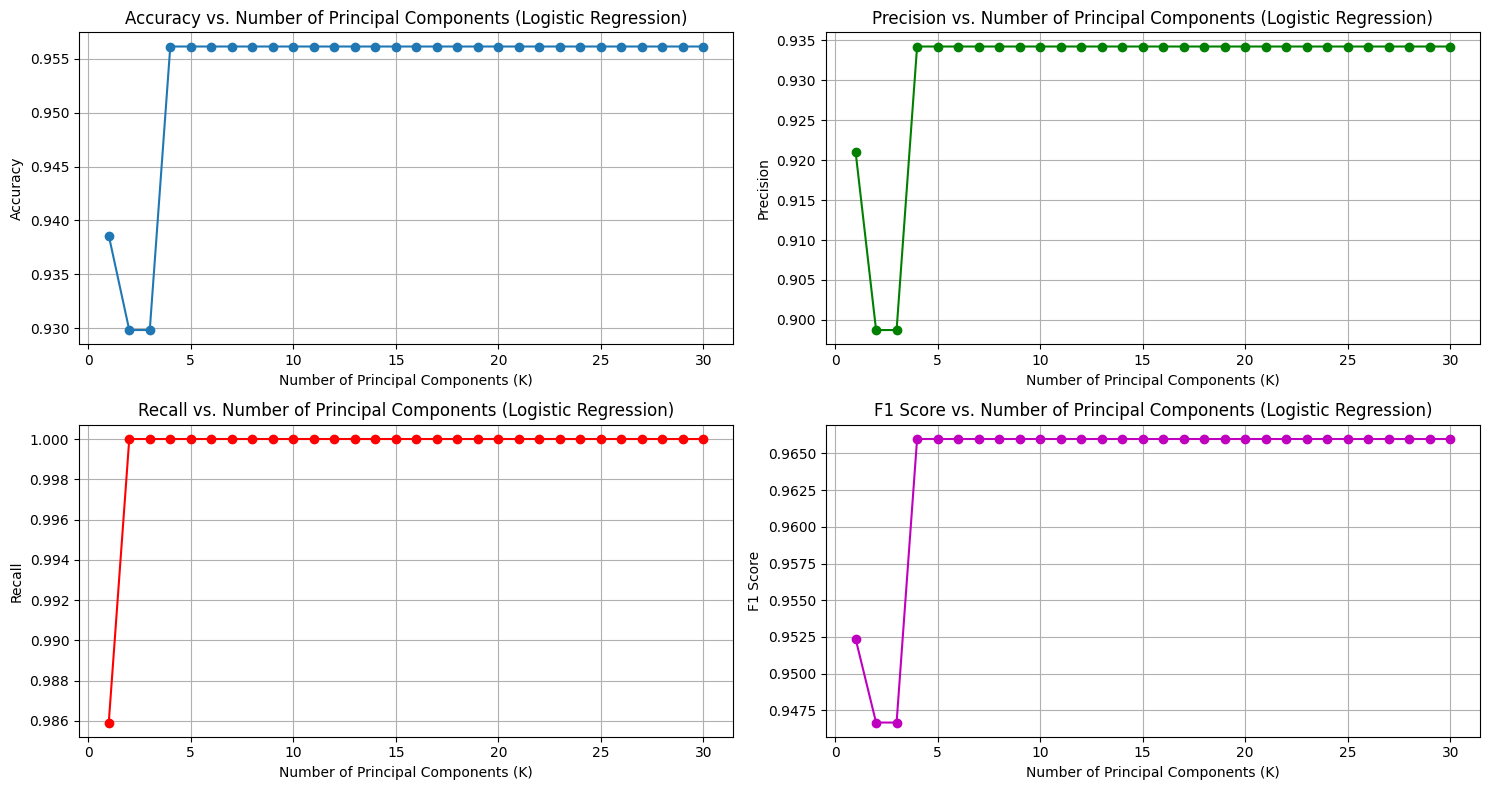

In [18]:
# Import necessary libraries
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# Define a function to apply PCA and train Logistic Regression for different K values
def train_log_reg_with_pca(X_train, X_test, y_train, y_test, max_components=30):
    accuracies, precisions, recalls, f1_scores = [], [], [], []

    # Iterate over different numbers of principal components (K)
    for k in range(1, max_components + 1):
        # Apply PCA with K components
        pca = PCA(n_components=k)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        # Train Logistic Regression on the PCA-transformed data
        log_reg = LogisticRegression(max_iter=3000, solver='saga', random_state=42)
        log_reg.fit(X_train_pca, y_train)

        # Make predictions on the test set
        y_pred = log_reg.predict(X_test_pca)

        # Calculate metrics
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Store metrics for this value of K
        accuracies.append(acc)
        precisions.append(prec)
        recalls.append(rec)
        f1_scores.append(f1)

    return accuracies, precisions, recalls, f1_scores

# Load the cancer dataset
cancer_data = load_breast_cancer()
X_cancer = cancer_data.data
y_cancer = cancer_data.target

# Split the dataset into training (80%) and testing (20%) sets
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(
    X_cancer, y_cancer, test_size=0.2, random_state=42
)

# Apply PCA and train Logistic Regression on different K values
max_components = X_cancer.shape[1]
accuracies_lr, precisions_lr, recalls_lr, f1_scores_lr = train_log_reg_with_pca(
    X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer, max_components
)

# Plot accuracy, precision, recall, and F1 score over different K values
plt.figure(figsize=(15, 8))

# Plot Accuracy
plt.subplot(2, 2, 1)
plt.plot(range(1, max_components + 1), accuracies_lr, marker='o', label='Accuracy')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Principal Components (Logistic Regression)')
plt.grid(True)

# Plot Precision
plt.subplot(2, 2, 2)
plt.plot(range(1, max_components + 1), precisions_lr, marker='o', label='Precision', color='g')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Precision')
plt.title('Precision vs. Number of Principal Components (Logistic Regression)')
plt.grid(True)

# Plot Recall
plt.subplot(2, 2, 3)
plt.plot(range(1, max_components + 1), recalls_lr, marker='o', label='Recall', color='r')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Recall')
plt.title('Recall vs. Number of Principal Components (Logistic Regression)')
plt.grid(True)

# Plot F1 Score
plt.subplot(2, 2, 4)
plt.plot(range(1, max_components + 1), f1_scores_lr, marker='o', label='F1 Score', color='m')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Number of Principal Components (Logistic Regression)')
plt.grid(True)

# Display the plots
plt.tight_layout()
plt.show()
